# Assignment 4

## New Balance

In [1]:
#!pip install praw

In [34]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


# Authentication

In [35]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="nTYMiIztyc5UFkzNtZCanw",
    client_secret="BcSyu6Q8pJjEJY3Q60uqkIXwQIOYQw",
    user_agent=user_agent
)

In [36]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Get Trending Topic from your Subreddit
## The "newbalance" subreddit channel will be use for this project

In [37]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("newbalance").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

New rules of the sub are in place. Please take some time to read those before posting and commenting. Post flairs also enabled. Hopefully these new measures can make the sub more organized. Feel free to let us know if you have any questions or concerns. Peace ✌️
vp5tk1
BlazingCookies47
1656695509.0
95
0.97
https://www.reddit.com/gallery/vp5tk1
0


# Get total comment in Subreddit

In [38]:
headlines = set()
for submission in reddit.subreddit("newbalance").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

925


In [39]:
#Create a dataframe from the scrapped data 
newbalance_df = pd.DataFrame(headlines)
newbalance_df.head()

,0
0,Wide or x-wide: changes volume or entire shoe/...
1,can someone help me identify this shoe?
2,Spring cleaning 🤓
3,990v4 - love this colorway!
4,990v3 work fit


In [40]:
newbalance_df.columns

RangeIndex(start=0, stop=1, step=1)

In [41]:
newbalance_df.columns = ['Titles']

In [42]:
newbalance_df.head()

,Titles
0,Wide or x-wide: changes volume or entire shoe/...
1,can someone help me identify this shoe?
2,Spring cleaning 🤓
3,990v4 - love this colorway!
4,990v3 work fit


In [43]:
newbalance_df.Titles.duplicated().sum() 

0

In [44]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
newbalance_df["Titles"]= newbalance_df["Titles"].apply(cleanTxt)

#Show the clean text
newbalance_df.head()

,Titles
0,Wide or x-wide changes volume or entire shoe/s...
1,can someone help me identify this shoe?
2,Spring cleaning 🤓
3,990v4 - love this colorway!
4,990v3 work fit


In [45]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
newbalance_df["Titles"]= newbalance_df["Titles"].apply(remove_emoji)

#Show the clean text
newbalance_df.head()

,Titles
0,Wide or x-wide changes volume or entire shoe/s...
1,can someone help me identify this shoe?
2,Spring cleaning
3,990v4 - love this colorway!
4,990v3 work fit


In [46]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [47]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [48]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
newbalance_df['Subjectivity'] = newbalance_df['Titles'].apply(getSubjectivity)
newbalance_df['Polarity'] = newbalance_df['Titles'].apply(getPolarity)

#Now display data
newbalance_df.head()

,Titles,Subjectivity,Polarity
0,Wide or x-wide changes volume or entire shoe/s...,0.5125,-0.050
1,can someone help me identify this shoe?,0.0000,0.000
2,Spring cleaning,0.0000,0.000
3,990v4 - love this colorway!,0.6000,0.625
4,990v3 work fit,0.4000,0.400


In [49]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
newbalance_df["Insight"] = newbalance_df["Polarity"].apply(getInsight)

newbalance_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Wide or x-wide changes volume or entire shoe/s...,0.512500,-0.050000,Negative
1,can someone help me identify this shoe?,0.000000,0.000000,Neutral
2,Spring cleaning,0.000000,0.000000,Neutral
3,990v4 - love this colorway!,0.600000,0.625000,Positive
4,990v3 work fit,0.400000,0.400000,Positive
5,Is there a NB sizing chart or database anywhere,0.000000,0.000000,Neutral
6,Im looking for this set? Whats the name ? I ca...,0.000000,0.000000,Neutral
7,Silver Metallic 1906r,0.000000,0.000000,Neutral
8,Does anyone know what kind of New Balance 574 ...,0.677273,0.368182,Positive
9,Whichever Salehe 2002r is on my feet becomes m...,0.850000,0.650000,Positive


# Data Visualisation

In [50]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

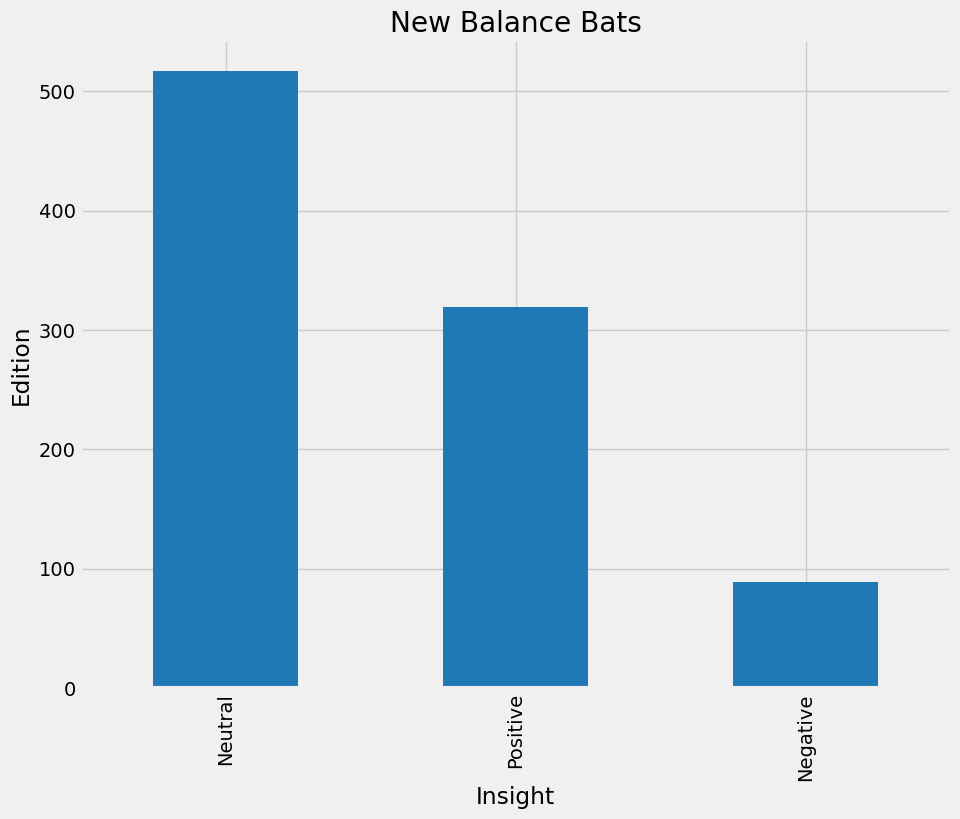

In [51]:
#Plot the values count of sentiment
plt.title("New Balance Bats")
plt.xlabel("Price")
plt.ylabel("Edition")
plt.rcParams["figure.figsize"] = (10,8)
newbalance_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

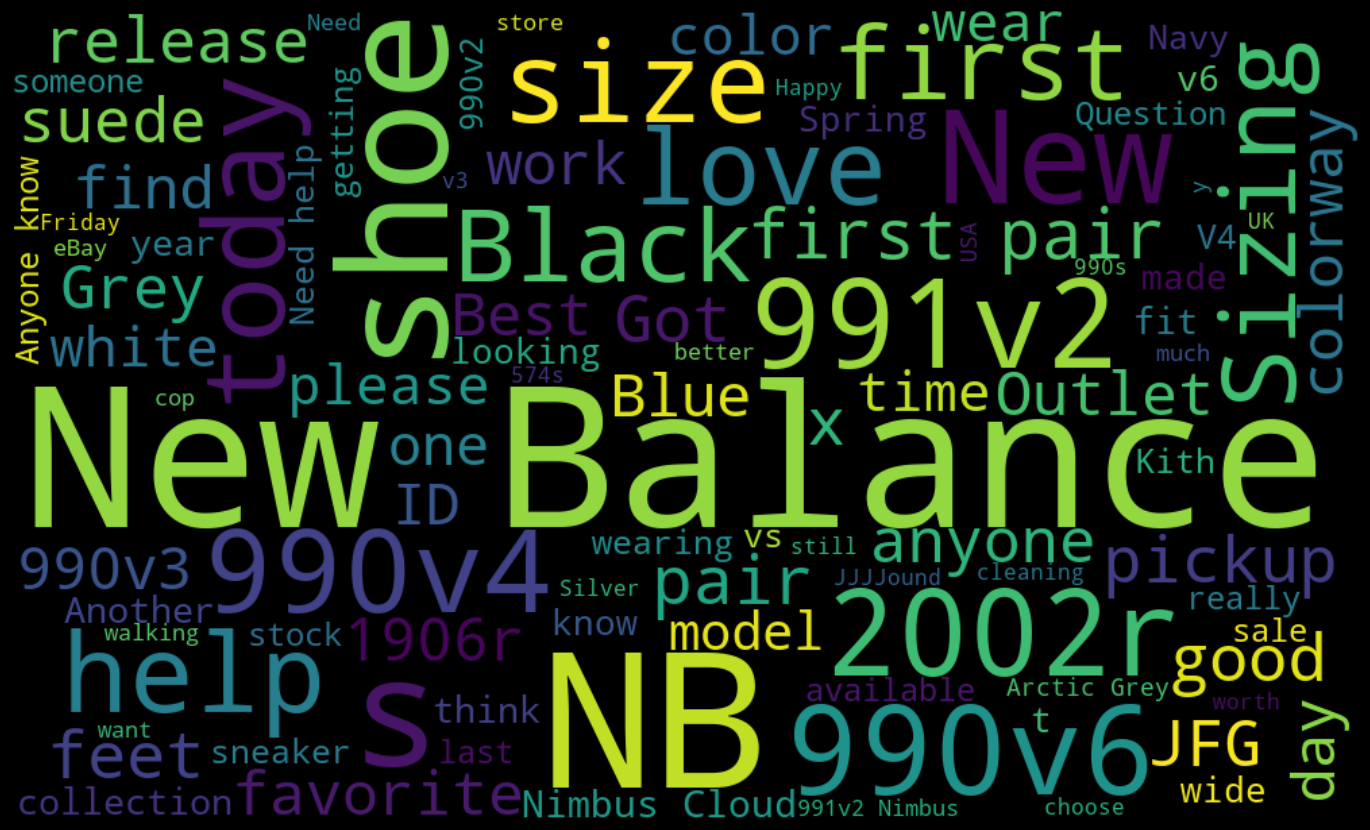

In [52]:
text = ' '.join( [twts for twts in newbalance_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");